***Initial Results and Code - Healthcare Dataset Analysis***

# **1. Data Analysis**

This Data Analysis section summerizes the key features of the healthcare dataset usimg descriptive statistics and visualizations.     
It hightlights patterns, trends, and outliers that may influence future modeling.



In [1]:
# Import Libraries

import numpy as np
import pandas as pd
import matplotlib .pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score
from xgboost import XGBRegressor
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

In [3]:
# Checking Dataset

df = pd.read_csv("/content/healthcare_dataset.csv")
df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.28131,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.32729,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.09608,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.78241,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.31781,458,Urgent,2022-10-09,Penicillin,Abnormal


In [4]:
print(df)

                    Name  Age  Gender Blood Type Medical Condition  \
0          Bobby JacksOn   30    Male         B-            Cancer   
1           LesLie TErRy   62    Male         A+           Obesity   
2            DaNnY sMitH   76  Female         A-           Obesity   
3           andrEw waTtS   28  Female         O+          Diabetes   
4          adrIENNE bEll   43  Female        AB+            Cancer   
...                  ...  ...     ...        ...               ...   
55495  eLIZABeTH jaCkSOn   42  Female         O+            Asthma   
55496         KYle pEREz   61  Female        AB-           Obesity   
55497       HEATher WaNG   38  Female         B+      Hypertension   
55498     JENniFER JOneS   43    Male         O-         Arthritis   
55499       jAMES GARCiA   53  Female         O+         Arthritis   

      Date of Admission            Doctor                      Hospital  \
0            2024-01-31     Matthew Smith               Sons and Miller   
1        

# **2. Data Preparation Section**


In [5]:
# Overview of Data shape

df.shape

(55500, 15)

In [6]:
df.dtypes

,0
Name,object
Age,int64
Gender,object
Blood Type,object
Medical Condition,object
Date of Admission,object
Doctor,object
Hospital,object
Insurance Provider,object
Billing Amount,float64


In [7]:
# Info about each Column

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                55500 non-null  object 
 1   Age                 55500 non-null  int64  
 2   Gender              55500 non-null  object 
 3   Blood Type          55500 non-null  object 
 4   Medical Condition   55500 non-null  object 
 5   Date of Admission   55500 non-null  object 
 6   Doctor              55500 non-null  object 
 7   Hospital            55500 non-null  object 
 8   Insurance Provider  55500 non-null  object 
 9   Billing Amount      55500 non-null  float64
 10  Room Number         55500 non-null  int64  
 11  Admission Type      55500 non-null  object 
 12  Discharge Date      55500 non-null  object 
 13  Medication          55500 non-null  object 
 14  Test Results        55500 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 6.4

In [8]:
# Checking Columns

df.columns

Index(['Name', 'Age', 'Gender', 'Blood Type', 'Medical Condition',
       'Date of Admission', 'Doctor', 'Hospital', 'Insurance Provider',
       'Billing Amount', 'Room Number', 'Admission Type', 'Discharge Date',
       'Medication', 'Test Results'],
      dtype='object')

In [9]:
# Missing Value
df.isnull()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55495,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
55496,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
55497,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
55498,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [10]:
# Removing Missing Values

df.dropna()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281310,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327290,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096080,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317810,458,Urgent,2022-10-09,Penicillin,Abnormal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55495,eLIZABeTH jaCkSOn,42,Female,O+,Asthma,2020-08-16,Joshua Jarvis,Jones-Thompson,Blue Cross,2650.714952,417,Elective,2020-09-15,Penicillin,Abnormal
55496,KYle pEREz,61,Female,AB-,Obesity,2020-01-23,Taylor Sullivan,Tucker-Moyer,Cigna,31457.797310,316,Elective,2020-02-01,Aspirin,Normal
55497,HEATher WaNG,38,Female,B+,Hypertension,2020-07-13,Joe Jacobs DVM,"and Mahoney Johnson Vasquez,",UnitedHealthcare,27620.764720,347,Urgent,2020-08-10,Ibuprofen,Abnormal
55498,JENniFER JOneS,43,Male,O-,Arthritis,2019-05-25,Kimberly Curry,"Jackson Todd and Castro,",Medicare,32451.092360,321,Elective,2019-05-31,Ibuprofen,Abnormal


In [11]:
# Checking Nulls

df.isna().sum()

,0
Name,0
Age,0
Gender,0
Blood Type,0
Medical Condition,0
Date of Admission,0
Doctor,0
Hospital,0
Insurance Provider,0
Billing Amount,0


In [12]:
# Discriptive Statisticsl for Numerical Variables

numeric_Variable = df.describe()
print("Numeric Variable:")
display(numeric_Variable)

Numeric Variable:


,Age,Billing Amount,Room Number
count,55500.000000,55500.000000,55500.000000
mean,51.539459,25539.316097,301.134829
std,19.602454,14211.454431,115.243069
min,13.000000,-2008.492140,101.000000
25%,35.000000,13241.224655,202.000000
50%,52.000000,25538.069380,302.000000
75%,68.000000,37820.508432,401.000000
max,89.000000,52764.276740,500.000000


In [13]:
# 'Date of  Admission' and 'Discharge Date' converting from data type columns to date columns

df['Date of Admission']=pd.to_datetime(df['Date of Admission'])
df['Discharge Date']=pd.to_datetime(df['Discharge Date'])

# patient staying Number of days in Hospital

df['Hospital Days']=(df['Discharge Date']-df['Date of Admission']).dt.days

In [14]:
df.describe()

,Age,Date of Admission,Billing Amount,Room Number,Discharge Date,Hospital Days
count,55500.000000,55500,55500.000000,55500.000000,55500,55500.000000
mean,51.539459,2021-11-01 01:02:22.443243008,25539.316097,301.134829,2021-11-16 13:15:20.821621504,15.509009
min,13.000000,2019-05-08 00:00:00,-2008.492140,101.000000,2019-05-09 00:00:00,1.000000
25%,35.000000,2020-07-28 00:00:00,13241.224655,202.000000,2020-08-12 00:00:00,8.000000
50%,52.000000,2021-11-01 00:00:00,25538.069380,302.000000,2021-11-17 00:00:00,15.000000
75%,68.000000,2023-02-03 00:00:00,37820.508432,401.000000,2023-02-18 00:00:00,23.000000
max,89.000000,2024-05-07 00:00:00,52764.276740,500.000000,2024-06-06 00:00:00,30.000000
std,19.602454,NaN,14211.454431,115.243069,NaN,8.659600


In [15]:
# Stastical summary of Categorical Columns

df.describe(include='O')

,Name,Gender,Blood Type,Medical Condition,Doctor,Hospital,Insurance Provider,Admission Type,Medication,Test Results
count,55500,55500,55500,55500,55500,55500,55500,55500,55500,55500
unique,49992,2,8,6,40341,39876,5,3,5,3
top,DAvId muNoZ,Male,A-,Arthritis,Michael Smith,LLC Smith,Cigna,Elective,Lipitor,Abnormal
freq,3,27774,6969,9308,27,44,11249,18655,11140,18627


In [16]:
# Checking Duplicates

df.duplicated().sum()

np.int64(534)

In [17]:
# Removing Duplicates

df = df.drop_duplicates()

In [18]:
df.describe()

,Age,Date of Admission,Billing Amount,Room Number,Discharge Date,Hospital Days
count,54966.000000,54966,54966.000000,54966.000000,54966,54966.000000
mean,51.535185,2021-11-01 17:35:29.505512448,25544.306284,301.124404,2021-11-17 05:34:28.202161408,15.499290
min,13.000000,2019-05-08 00:00:00,-2008.492140,101.000000,2019-05-09 00:00:00,1.000000
25%,35.000000,2020-07-28 00:00:00,13243.718638,202.000000,2020-08-13 00:00:00,8.000000
50%,52.000000,2021-11-02 00:00:00,25542.749145,302.000000,2021-11-18 00:00:00,15.000000
75%,68.000000,2023-02-03 00:00:00,37819.858157,401.000000,2023-02-19 00:00:00,23.000000
max,89.000000,2024-05-07 00:00:00,52764.276740,500.000000,2024-06-06 00:00:00,30.000000
std,19.605661,NaN,14208.409711,115.223143,NaN,8.661471


**Data Visualizations**

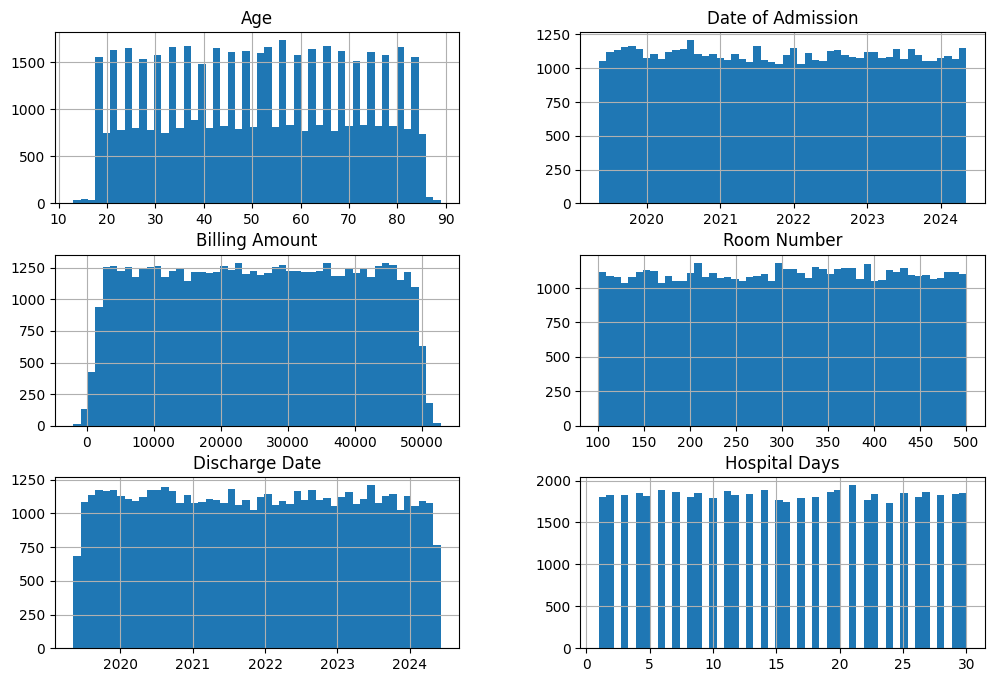

In [19]:
# Histogram of numerical variables

df.hist(bins = 50, figsize=(12,8))
plt.show()

In [20]:
df['Age'].describe()

,Age
count,54966.000000
mean,51.535185
std,19.605661
min,13.000000
25%,35.000000
50%,52.000000
75%,68.000000
max,89.000000


In [21]:
df['Age'].mode()

,Age
0,38


 **Minimum Age is 13, maximum Age is 89, Most common Age is 38**

In [22]:
Age_counts = df['Age'].value_counts().sort_index()
print(Age_counts)

Age
13     14
14     18
15     28
16     24
17     32
     ... 
85    734
86     41
87     31
88     25
89      8
Name: count, Length: 77, dtype: int64


/tmp/ipython-input-750738909.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x="Test Results", data=df, palette="viridis")


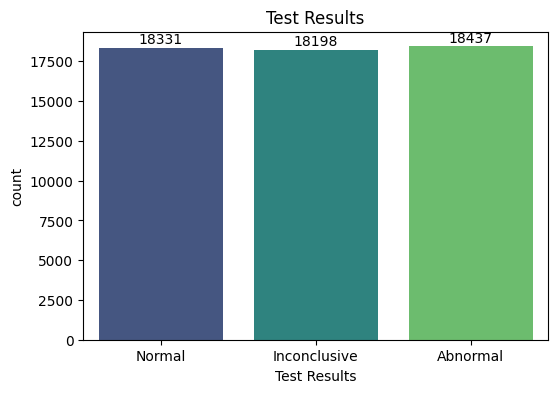

In [23]:
plt.figure(figsize=(6,4))
ax = sns.countplot(x="Test Results", data=df, palette="viridis")
for container in ax.containers:
    ax.bar_label(container, fmt='%d', padding=1)
plt.title("Test Results")
plt.show()

Text(0, 0.5, 'Number of Patients')

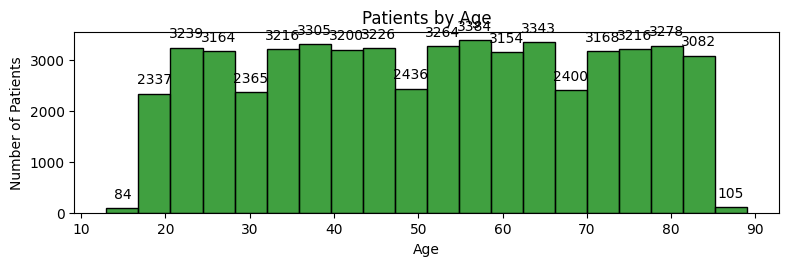

In [24]:
# Age Distribution

plt.figure(figsize=(20,8))
plt.subplot(3,2,1)
ax = sns.histplot(data=df, x="Age", bins=20, color="green", edgecolor="black")
for container in ax.containers:
    ax.bar_label(container, fmt='%d', padding=5)
plt.title("Patients by Age")
plt.xlabel("Age", size= 10)
plt.ylabel("Number of Patients", size = 10)

Text(0.5, 1.0, 'Patients by Gender')

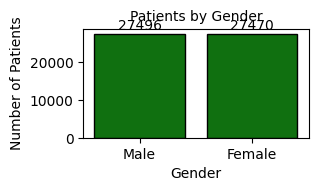

In [25]:
#Gender Distribution

plt.subplot(3,2,1)
ax = sns.countplot(data=df, x="Gender", color="green", edgecolor="black")
for container in ax.containers:
    ax.bar_label(container, fmt='%d', padding=1)

plt.xlabel("Gender", size= 10)
plt.ylabel("Number of Patients", size = 10)
plt.title("Patients by Gender", size = 10)

/tmp/ipython-input-1914236119.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, y="Medical Condition", color ="green", edgecolor="black", palette="viridis")


Text(0.5, 0, 'Number of Patients')

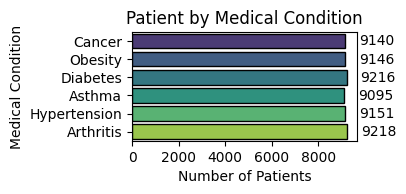

In [26]:
# Medical Condition Distribution

plt.subplot(3,2,3)
ax = sns.countplot(data=df, y="Medical Condition", color ="green", edgecolor="black", palette="viridis")
for container in ax.containers:
    ax.bar_label(container, fmt='%d', padding=10)
plt.title('Patient by Medical Condition')
plt.ylabel('Medical Condition', size= 10)
plt.xlabel('Number of Patients', size= 10 )

/tmp/ipython-input-2443720150.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, y='Insurance Provider', edgecolor= 'black', color= 'lightgreen', palette="pastel")


Text(0.5, 0, 'Number of Patients')

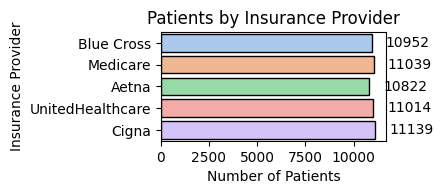

In [27]:
#Insurance Provider Distribution

plt.subplot(3,2,4)
ax = sns.countplot(data=df, y='Insurance Provider', edgecolor= 'black', color= 'lightgreen', palette="pastel")
for container in ax.containers:
    ax.bar_label(container, fmt='%d', padding=10)
plt.title('Patients by Insurance Provider')
plt.ylabel('Insurance Provider', size= 10)
plt.xlabel('Number of Patients', size=10)

/tmp/ipython-input-439735260.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x='Blood Type', edgecolor= 'black', color= 'lightgreen', palette="pastel")


Text(0, 0.5, 'Number of Patients')

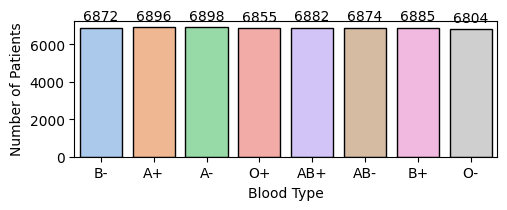

In [28]:
# Blood Type Distribution

plt.figure(figsize=(12,6))
plt.subplot(3,2,4)
ax = sns.countplot(data=df, x='Blood Type', edgecolor= 'black', color= 'lightgreen', palette="pastel")
for container in ax.containers:
    ax.bar_label(container, fmt='%d', padding=3)
plt.xlabel('Blood Type', size= 10)
plt.ylabel('Number of Patients', size=10)

/tmp/ipython-input-2787047626.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x='Test Results', edgecolor= 'black', color= 'lightgreen', palette="pastel")


Text(0, 0.5, 'Number of Patients')

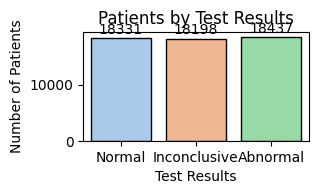

In [29]:
# Test Results Distribution

plt.subplot(3,2,4)
ax = sns.countplot(data=df, x='Test Results', edgecolor= 'black', color= 'lightgreen', palette="pastel")
for container in ax.containers:
    ax.bar_label(container, fmt='%d', padding=1)
plt.title('Patients by Test Results')
plt.xlabel('Test Results', size= 10)
plt.ylabel('Number of Patients', size=10)

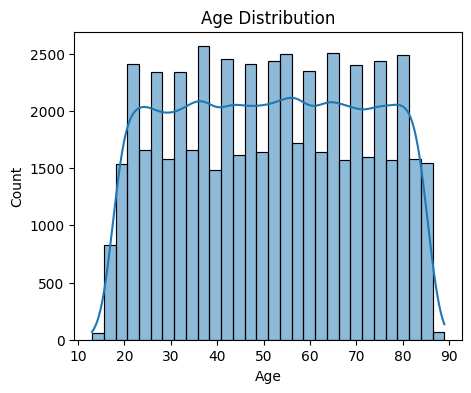

In [30]:
plt.figure(figsize=(5,4))
sns.histplot(df["Age"], bins=30, kde= True)
plt.title("Age Distribution")
plt.show()

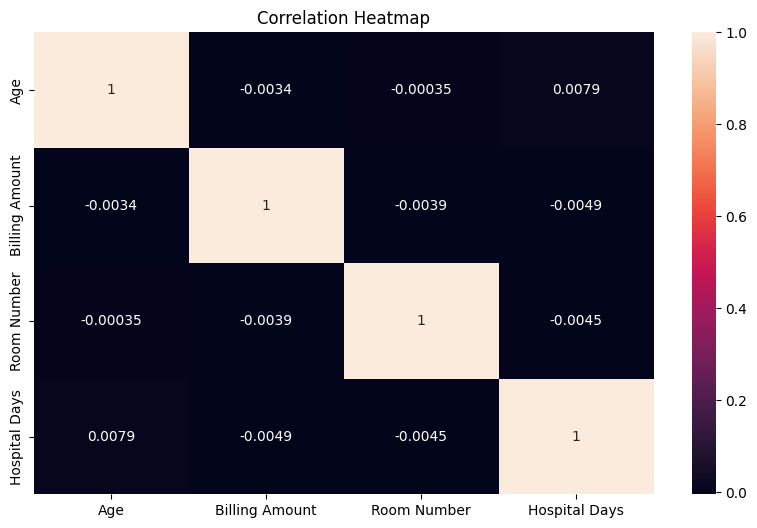

In [31]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True)
plt.title("Correlation Heatmap")
plt.show()

In [32]:
Columns = ['Gender', 'Blood Type', 'Medical Condition', 'Insurance Provider',
           'Admission Type', 'Medication', 'Test Results']

In [33]:
import plotly.graph_objects as go
import plotly.offline as pyo
import plotly.io as pio

/tmp/ipython-input-3002929408.py:6: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




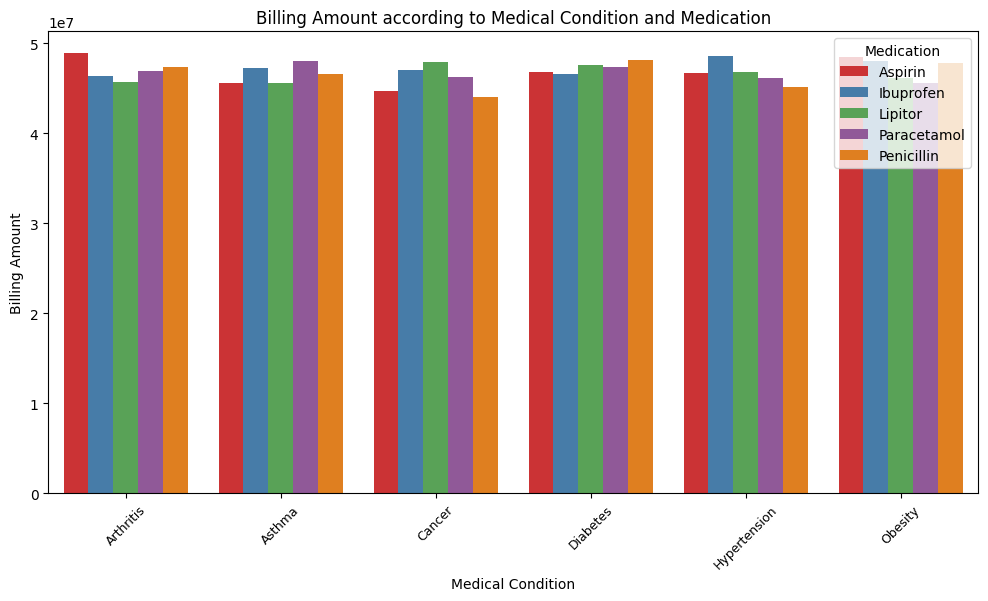

In [34]:
# Billing Amount according to Medical Condition and Medication

df_trans = df.groupby(['Medical Condition', 'Medication'])[['Billing Amount']].sum().reset_index()

plt.figure(figsize=(12,6))
sns.barplot(x=df_trans['Medical Condition'], y=df_trans['Billing Amount'], hue=df_trans['Medication'], ci=None, palette="Set1")
plt.title("Billing Amount according to Medical Condition and Medication")
plt.ylabel("Billing Amount")
plt.xticks(rotation=45, fontsize = 9)
plt.show()

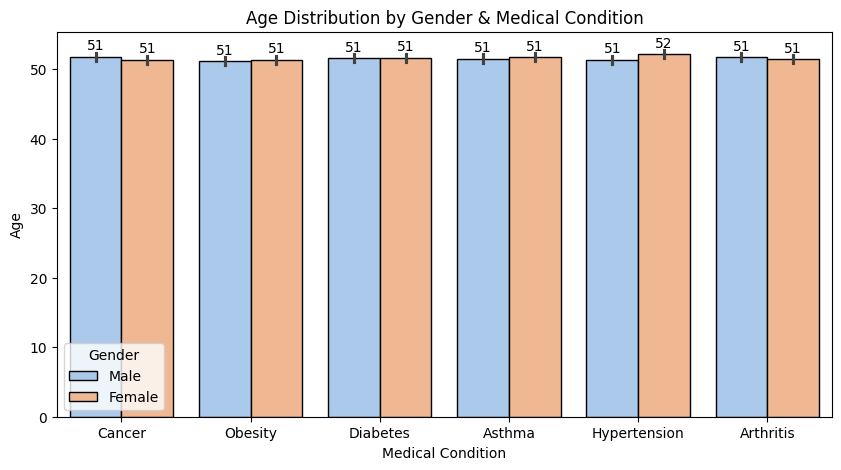

In [35]:
# Age Distribution by Gender & Medical Condition

plt.figure(figsize=(10,5))
ax = sns.barplot(data=df, x="Medical Condition", y= "Age", hue="Gender",edgecolor= "black", palette="pastel")
for container in ax.containers:
    ax.bar_label(container, fmt='%d', padding=3)
plt.title("Age Distribution by Gender & Medical Condition")
plt.xlabel("Medical Condition", size=10)
plt.ylabel("Age", size=10)
plt.show()

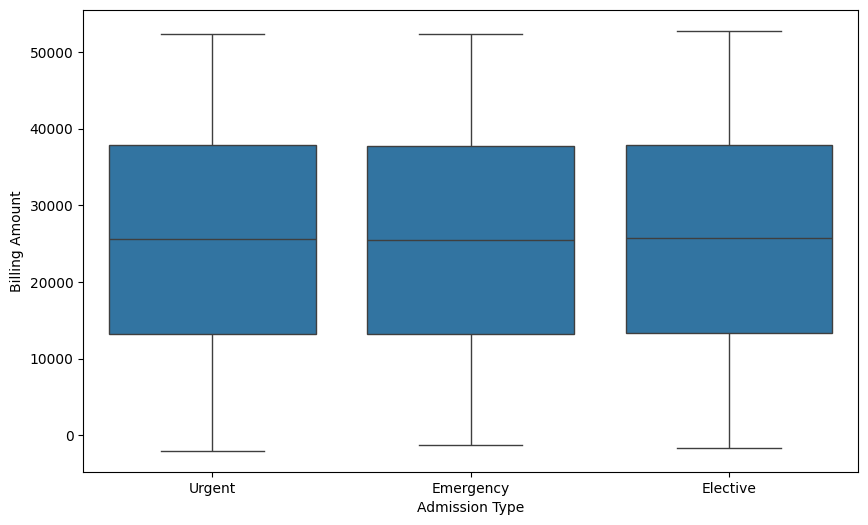

In [36]:
plt.figure(figsize=(10,6))
sns.boxplot(data = df, x='Admission Type', y='Billing Amount')
plt.show()

# **3. Model Evalution Section**

**Predictive Modeling**

Regression Models - Predictive Billing Amount

Classification Models - Predictive Admission Type

In [37]:
# Regression Models - Predictive Billing Amount
# Target Variable : Billing Amount
# Remove non-numrric or not usefull columns
Features = df.drop(columns=["Name", "Billing Amount", "Date of Admission", "Discharge Date"])

X_reg = Features
y_reg = df["Billing Amount"]

In [38]:
categorical_cols = X_reg.select_dtypes(include="object").columns.tolist()
print("Categorical Columns:", categorical_cols)

Categorical Columns: ['Gender', 'Blood Type', 'Medical Condition', 'Doctor', 'Hospital', 'Insurance Provider', 'Admission Type', 'Medication', 'Test Results']


In [39]:
le = LabelEncoder()
for col in ['Gender', 'Blood Type', 'Admission Type', 'Medical Condition', 'Doctor', 'Hospital', 'Insurance Provider', 'Medication', 'Test Results']:
  df[col]= le.fit_transform(df[col])


In [40]:
X_encoded = X_reg.copy()
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    X_encoded[col] = le.fit_transform(X_encoded[col].astype(str))
    label_encoders[col] = le

In [41]:
# Train-Test Split

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_encoded, y_reg, test_size=0.2, random_state=42)

In [43]:
# Random Forest Regression

rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train_reg, y_train_reg)

y_pred_reg = rf_reg.predict(X_test_reg)

mae = mean_absolute_error(y_test_reg, y_pred_reg)
mse = np.sqrt(mean_squared_error(y_test_reg, y_pred_reg))

print("Random Forest Regressor MAE:", mae)
print("Random Forest Regressor MSE:", mse)

Random Forest Regressor MAE: 11494.132916065746
Random Forest Regressor MSE: 13580.794321661371


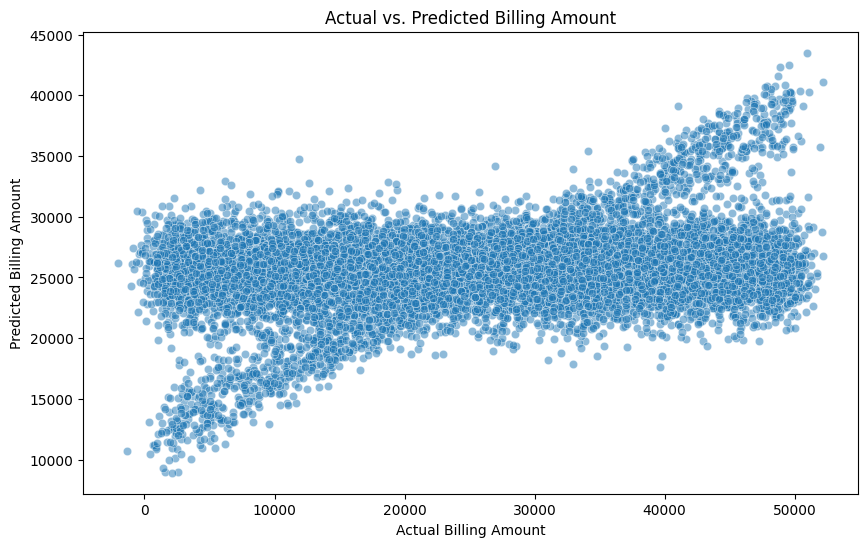

In [44]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=y_test_reg, y=y_pred_reg, alpha=0.5)
plt.xlabel("Actual Billing Amount")
plt.ylabel("Predicted Billing Amount")
plt.title("Actual vs. Predicted Billing Amount")
plt.show()

In [45]:
# Classification - Predicting Admission Type
# Target Variable: Admission Type

X_clf = df.drop(columns=['Name', 'Admission Type', 'Date of Admission', 'Discharge Date', 'Billing Amount'])
y_clf = df['Admission Type']

# Encode the target variable
le = LabelEncoder()
y_clf_encoded = le.fit_transform(y_clf)

In [46]:
# Train-Test Split

X_train_clf, X_test_clf, y_train_clf_encoded, y_test_clf_encoded = train_test_split(X_clf, y_clf_encoded, test_size=0.2, random_state=42)

In [47]:
# Random Forest Classifier

rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train_clf, y_train_clf_encoded)

y_pred_clf = rf_clf.predict(X_test_clf)

Classification Report:
               precision    recall  f1-score   support

           0       0.42      0.46      0.44      3665
           1       0.44      0.41      0.43      3691
           2       0.43      0.43      0.43      3638

    accuracy                           0.43     10994
   macro avg       0.43      0.43      0.43     10994
weighted avg       0.43      0.43      0.43     10994



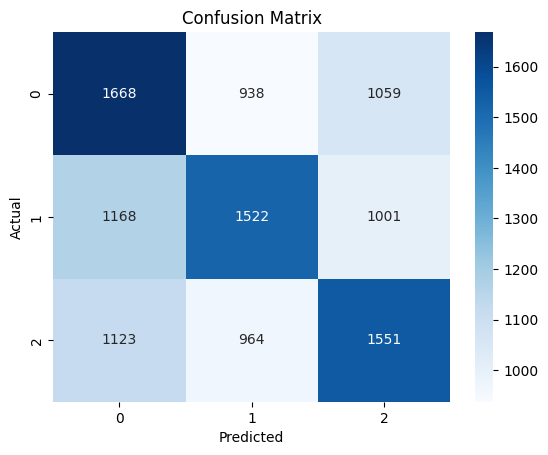

In [48]:
import numpy as ndarray
print("Classification Report:\n", classification_report(y_test_clf_encoded, y_pred_clf))

confusion_matrix = confusion_matrix(y_test_clf_encoded, y_pred_clf)
sns.heatmap(confusion_matrix, annot=True, fmt= 'd', cmap= 'Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Linear Regression and XGBoost Regressor for Billing Amount

Logistic Regression and XGBoost classifier for Admission Type


In [49]:
# 1. Linear Regression

linreg = LinearRegression()
linreg.fit(X_train_reg, y_train_reg)

y_pred_lin = linreg.predict(X_test_reg)

mae_lin = mean_absolute_error(y_test_reg, y_pred_lin)
mse_lin = np.sqrt(mean_squared_error(y_test_reg, y_pred_lin))

print("Linear Regression MAE:", mae_lin)
print("Linear Regression MSE:", mse_lin)

Linear Regression MAE: 12367.562984686516
Linear Regression MSE: 14271.014322744362


In [50]:
# 1. XGBoost Regressor

xgb_reg = XGBRegressor(n_estimators = 100, learning_rate = 0.1, random_state=42)
xgb_reg.fit(X_train_reg, y_train_reg)

y_pred_xgb = xgb_reg.predict(X_test_reg)

mae_xgb = mean_absolute_error(y_test_reg, y_pred_xgb)
mse_xgb = np.sqrt(mean_squared_error(y_test_reg, y_pred_xgb))

print("XGBoost Regression MAE:", mae_xgb)
print("XGBoost Regression MSE:", mse_xgb)


XGBoost Regression MAE: 12344.971002172202
XGBoost Regression MSE: 14263.764130595791


In [51]:
# Classification Models - Predicting Admission Type

# 1. Logistics Regression

logreg = LogisticRegression(max_iter=2000)
logreg.fit(X_train_clf, y_train_clf_encoded)

y_pred_log = logreg.predict(X_test_clf)
print("Logistic Regression:\n", classification_report(y_test_clf_encoded, y_pred_log))

Logistic Regression:
               precision    recall  f1-score   support

           0       0.33      0.49      0.40      3665
           1       0.36      0.07      0.12      3691
           2       0.34      0.45      0.39      3638

    accuracy                           0.34     10994
   macro avg       0.34      0.34      0.30     10994
weighted avg       0.34      0.34      0.30     10994



/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [52]:
# 1. XGBoost Classifier

xgb_clf = XGBClassifier(n_estimators=200,learning_rate= 0.1, max_depth = 6, subsample=0.9, colsample_bytree=0.9, objective='multi:softprob', eval_metric= 'mlogloss')
xgb_clf.fit(X_train_clf, y_train_clf_encoded)

y_pred_xgb_clf = xgb_clf.predict(X_test_clf)

print("XGBoost Classifier:\n", classification_report(y_test_clf_encoded, y_pred_xgb_clf))

XGBoost Classifier:
               precision    recall  f1-score   support

           0       0.36      0.40      0.38      3665
           1       0.39      0.33      0.36      3691
           2       0.37      0.39      0.38      3638

    accuracy                           0.37     10994
   macro avg       0.37      0.37      0.37     10994
weighted avg       0.37      0.37      0.37     10994



In [53]:
# Model Comparision Summery

print("Regression Metricx:")
print(f"Linear Regression: MAE={mae_lin:.2f}, MSE={mse_lin:.2f}")

print(f"Random Forest: MAE={mae:.2f}, MSE={mse:.2f}")
print(f"XGBoost: MAE={mae_xgb:.2f}, MSE={mse_xgb:.2f}")

print("\n Classification Accuracy Score:")
print(f"Logistic Regression: {accuracy_score(y_test_clf_encoded, y_pred_log):.4f}")

print(f"Random Forest: {accuracy_score(y_test_clf_encoded, y_pred_clf):.4f}")
print(f"XGBoost: {accuracy_score(y_test_clf_encoded, y_pred_xgb_clf):.4f}")

Regression Metricx:
Linear Regression: MAE=12367.56, MSE=14271.01
Random Forest: MAE=11494.13, MSE=13580.79
XGBoost: MAE=12344.97, MSE=14263.76

 Classification Accuracy Score:
Logistic Regression: 0.3368
Random Forest: 0.4312
XGBoost: 0.3737
